In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
DATADIR="C:/Users/ROHIT/Downloads/PetImages"
CATEGORIES = ["Dog", "Cat"]

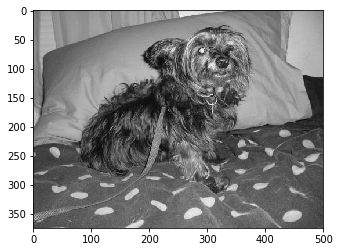

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array.shape)

(375, 500)


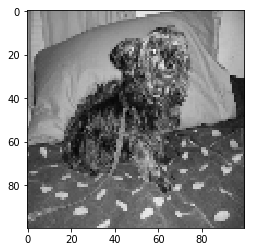

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
!pip install tqdm


In [8]:
from tqdm import tqdm


In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [02:14<00:00, 92.61it/s]


24946


In [10]:
import random

random.shuffle(training_data)

In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[250]
   [250]
   [250]
   ...
   [246]
   [242]
   [238]]

  [[250]
   [250]
   [250]
   ...
   [247]
   [231]
   [248]]

  [[250]
   [250]
   [250]
   ...
   [210]
   [247]
   [246]]

  ...

  [[227]
   [238]
   [223]
   ...
   [ 98]
   [161]
   [149]]

  [[228]
   [231]
   [232]
   ...
   [137]
   [ 87]
   [132]]

  [[230]
   [222]
   [223]
   ...
   [133]
   [ 82]
   [137]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [13]:
import tensorflow as tf

In [15]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential


In [16]:
model = Sequential()

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [19]:
X = X/255.0

In [20]:
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [21]:
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

In [29]:
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,np.asarray(y),batch_size=32,epochs=3,validation_split=0.1)


Train on 22451 samples, validate on 2495 samples
Epoch 1/3


 5856/22451 [======>.......................] - ETA: 4:04:19 - loss: 0.6934 - accuracy: 0.500 - ETA: 2:03:55 - loss: 0.6929 - accuracy: 0.515 - ETA: 1:23:39 - loss: 0.6927 - accuracy: 0.520 - ETA: 1:03:30 - loss: 0.6929 - accuracy: 0.515 - ETA: 51:25 - loss: 0.6933 - accuracy: 0.5063  - ETA: 43:21 - loss: 0.6939 - accuracy: 0.494 - ETA: 37:36 - loss: 0.6936 - accuracy: 0.500 - ETA: 33:16 - loss: 0.6933 - accuracy: 0.507 - ETA: 29:55 - loss: 0.6937 - accuracy: 0.493 - ETA: 27:13 - loss: 0.6937 - accuracy: 0.493 - ETA: 25:01 - loss: 0.6937 - accuracy: 0.491 - ETA: 23:11 - loss: 0.6936 - accuracy: 0.494 - ETA: 21:38 - loss: 0.6936 - accuracy: 0.492 - ETA: 20:18 - loss: 0.6936 - accuracy: 0.491 - ETA: 19:09 - loss: 0.6936 - accuracy: 0.489 - ETA: 18:08 - loss: 0.6934 - accuracy: 0.503 - ETA: 17:15 - loss: 0.6931 - accuracy: 0.512 - ETA: 16:27 - loss: 0.6930 - accuracy: 0.517 - ETA: 15:44 - loss: 0.6930 - accuracy: 0.516 - ETA: 15:06 - loss: 0.6930 - accuracy: 0.515 - ETA: 14:31 - loss: 0.69

11808/22451 [==============>...............] - ETA: 3:33 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:32 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:31 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:31 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:30 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:29 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:29 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:28 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:27 - loss: 0.6933 - accuracy: 0.51 - ETA: 3:27 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:26 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:25 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:25 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:24 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:23 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:23 - loss: 0.6931 - accuracy: 0.51 - ETA: 3:22 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:21 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:21 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:20 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:19 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:19 - loss: 0.6932 - ac

17760/22451 [======================>.......] - ETA: 1:58 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:58 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:57 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:57 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:56 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:56 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:56 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:55 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:55 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:54 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:54 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:54 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:53 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:53 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:52 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:52 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:52 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:51 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:51 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:50 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:50 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:50 - loss: 0.6933 - ac

22451/22451 [==============================] - ETA: 49s - loss: 0.6933 - accuracy: 0.503 - ETA: 49s - loss: 0.6933 - accuracy: 0.503 - ETA: 48s - loss: 0.6933 - accuracy: 0.503 - ETA: 48s - loss: 0.6933 - accuracy: 0.503 - ETA: 48s - loss: 0.6933 - accuracy: 0.503 - ETA: 47s - loss: 0.6933 - accuracy: 0.503 - ETA: 47s - loss: 0.6933 - accuracy: 0.502 - ETA: 46s - loss: 0.6933 - accuracy: 0.502 - ETA: 46s - loss: 0.6933 - accuracy: 0.502 - ETA: 46s - loss: 0.6933 - accuracy: 0.502 - ETA: 45s - loss: 0.6933 - accuracy: 0.502 - ETA: 45s - loss: 0.6933 - accuracy: 0.502 - ETA: 45s - loss: 0.6933 - accuracy: 0.502 - ETA: 44s - loss: 0.6933 - accuracy: 0.502 - ETA: 44s - loss: 0.6933 - accuracy: 0.503 - ETA: 44s - loss: 0.6933 - accuracy: 0.502 - ETA: 43s - loss: 0.6933 - accuracy: 0.503 - ETA: 43s - loss: 0.6933 - accuracy: 0.502 - ETA: 43s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - acc

 5952/22451 [======>.......................] - ETA: 3:33 - loss: 0.6937 - accuracy: 0.43 - ETA: 3:32 - loss: 0.6944 - accuracy: 0.37 - ETA: 3:32 - loss: 0.6943 - accuracy: 0.37 - ETA: 3:32 - loss: 0.6942 - accuracy: 0.38 - ETA: 3:32 - loss: 0.6940 - accuracy: 0.39 - ETA: 3:31 - loss: 0.6939 - accuracy: 0.40 - ETA: 3:31 - loss: 0.6938 - accuracy: 0.41 - ETA: 3:30 - loss: 0.6937 - accuracy: 0.42 - ETA: 3:30 - loss: 0.6938 - accuracy: 0.41 - ETA: 3:30 - loss: 0.6937 - accuracy: 0.42 - ETA: 3:29 - loss: 0.6936 - accuracy: 0.43 - ETA: 3:29 - loss: 0.6936 - accuracy: 0.44 - ETA: 3:29 - loss: 0.6936 - accuracy: 0.44 - ETA: 3:28 - loss: 0.6937 - accuracy: 0.43 - ETA: 3:28 - loss: 0.6936 - accuracy: 0.44 - ETA: 3:28 - loss: 0.6936 - accuracy: 0.45 - ETA: 3:28 - loss: 0.6935 - accuracy: 0.46 - ETA: 3:27 - loss: 0.6935 - accuracy: 0.46 - ETA: 3:27 - loss: 0.6935 - accuracy: 0.45 - ETA: 3:27 - loss: 0.6935 - accuracy: 0.46 - ETA: 3:26 - loss: 0.6935 - accuracy: 0.46 - ETA: 3:27 - loss: 0.6934 - ac

11904/22451 [==============>...............] - ETA: 2:37 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:35 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:35 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:35 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:34 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:34 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:34 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:33 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:33 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:33 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:33 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:32 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:32 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:32 - loss: 0.6932 - accuracy: 0.49 - ETA: 2:31 - loss: 0.6932 - accuracy: 0.49 - ETA: 2:31 - loss: 0.6932 - accuracy: 0.49 - ETA: 2:31 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:30 - loss: 0.6933 - accuracy: 0.49 - ETA: 2:30 - loss: 0.6933 - ac

17856/22451 [======================>.......] - ETA: 1:40 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:40 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:39 - loss: 0.6934 - accuracy: 0.49 - ETA: 1:39 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:39 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:37 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:37 - loss: 0.6934 - accuracy: 0.49 - ETA: 1:37 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:37 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:36 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:35 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:35 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:35 - loss: 0.6934 - accuracy: 0.49 - ETA: 1:34 - loss: 0.6934 - accuracy: 0.49 - ETA: 1:34 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:34 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:33 - loss: 0.6933 - ac

22451/22451 [==============================] - ETA: 43s - loss: 0.6933 - accuracy: 0.501 - ETA: 43s - loss: 0.6933 - accuracy: 0.501 - ETA: 42s - loss: 0.6933 - accuracy: 0.501 - ETA: 42s - loss: 0.6933 - accuracy: 0.501 - ETA: 42s - loss: 0.6933 - accuracy: 0.501 - ETA: 42s - loss: 0.6933 - accuracy: 0.500 - ETA: 41s - loss: 0.6933 - accuracy: 0.500 - ETA: 41s - loss: 0.6933 - accuracy: 0.500 - ETA: 41s - loss: 0.6933 - accuracy: 0.500 - ETA: 40s - loss: 0.6933 - accuracy: 0.501 - ETA: 40s - loss: 0.6933 - accuracy: 0.501 - ETA: 40s - loss: 0.6933 - accuracy: 0.500 - ETA: 39s - loss: 0.6933 - accuracy: 0.501 - ETA: 39s - loss: 0.6933 - accuracy: 0.501 - ETA: 39s - loss: 0.6933 - accuracy: 0.501 - ETA: 39s - loss: 0.6933 - accuracy: 0.501 - ETA: 38s - loss: 0.6933 - accuracy: 0.501 - ETA: 38s - loss: 0.6933 - accuracy: 0.501 - ETA: 38s - loss: 0.6933 - accuracy: 0.501 - ETA: 37s - loss: 0.6933 - accuracy: 0.501 - ETA: 37s - loss: 0.6933 - accuracy: 0.501 - ETA: 37s - loss: 0.6933 - acc

 5952/22451 [======>.......................] - ETA: 3:35 - loss: 0.6908 - accuracy: 0.59 - ETA: 3:35 - loss: 0.6892 - accuracy: 0.65 - ETA: 3:35 - loss: 0.6911 - accuracy: 0.58 - ETA: 3:35 - loss: 0.6929 - accuracy: 0.51 - ETA: 3:34 - loss: 0.6935 - accuracy: 0.49 - ETA: 3:34 - loss: 0.6936 - accuracy: 0.48 - ETA: 3:34 - loss: 0.6935 - accuracy: 0.49 - ETA: 3:34 - loss: 0.6937 - accuracy: 0.48 - ETA: 3:33 - loss: 0.6936 - accuracy: 0.48 - ETA: 3:33 - loss: 0.6935 - accuracy: 0.48 - ETA: 3:33 - loss: 0.6935 - accuracy: 0.49 - ETA: 3:32 - loss: 0.6934 - accuracy: 0.49 - ETA: 3:32 - loss: 0.6934 - accuracy: 0.49 - ETA: 3:32 - loss: 0.6933 - accuracy: 0.50 - ETA: 3:31 - loss: 0.6933 - accuracy: 0.50 - ETA: 3:31 - loss: 0.6933 - accuracy: 0.50 - ETA: 3:31 - loss: 0.6932 - accuracy: 0.50 - ETA: 3:30 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:30 - loss: 0.6932 - accuracy: 0.50 - ETA: 3:30 - loss: 0.6932 - accuracy: 0.51 - ETA: 3:29 - loss: 0.6931 - accuracy: 0.51 - ETA: 3:29 - loss: 0.6932 - ac

11904/22451 [==============>...............] - ETA: 2:38 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:37 - loss: 0.6932 - accuracy: 0.50 - ETA: 2:37 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:37 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:37 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:36 - loss: 0.6932 - accuracy: 0.50 - ETA: 2:36 - loss: 0.6932 - accuracy: 0.50 - ETA: 2:36 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:35 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:35 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:35 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:34 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:34 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:34 - loss: 0.6932 - accuracy: 0.50 - ETA: 2:33 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:33 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:33 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:33 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:32 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:32 - loss: 0.6930 - accuracy: 0.50 - ETA: 2:32 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:31 - loss: 0.6931 - ac

17856/22451 [======================>.......] - ETA: 1:41 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:40 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:40 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:40 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:39 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:39 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:39 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:38 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:37 - loss: 0.6933 - accuracy: 0.50 - ETA: 1:37 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:37 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:37 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:36 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:36 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:36 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:35 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:35 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:35 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:34 - loss: 0.6932 - accuracy: 0.50 - ETA: 1:34 - loss: 0.6932 - ac

22451/22451 [==============================] - ETA: 43s - loss: 0.6933 - accuracy: 0.503 - ETA: 43s - loss: 0.6933 - accuracy: 0.503 - ETA: 43s - loss: 0.6933 - accuracy: 0.503 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 42s - loss: 0.6933 - accuracy: 0.502 - ETA: 41s - loss: 0.6933 - accuracy: 0.502 - ETA: 41s - loss: 0.6933 - accuracy: 0.503 - ETA: 41s - loss: 0.6933 - accuracy: 0.502 - ETA: 40s - loss: 0.6933 - accuracy: 0.502 - ETA: 40s - loss: 0.6933 - accuracy: 0.502 - ETA: 40s - loss: 0.6933 - accuracy: 0.502 - ETA: 39s - loss: 0.6933 - accuracy: 0.502 - ETA: 39s - loss: 0.6933 - accuracy: 0.502 - ETA: 39s - loss: 0.6933 - accuracy: 0.502 - ETA: 38s - loss: 0.6933 - accuracy: 0.502 - ETA: 38s - loss: 0.6933 - accuracy: 0.502 - ETA: 38s - loss: 0.6933 - accuracy: 0.502 - ETA: 38s - loss: 0.6933 - accuracy: 0.502 - ETA: 37s - loss: 0.6933 - accuracy: 0.502 - ETA: 37s - loss: 0.6933 - acc

In [27]:
print(tf.__version__)

2.0.0


In [30]:
!git init


Initialized empty Git repository in C:/Users/ROHIT/.git/


In [ ]:
!git add Cats and Dogs.ipynb


In [ ]:
!git commit -m "first commit"


In [ ]:
!git remote add origin https://github.com/RohitTheBoss007/TensorflowModels.git
    

In [ ]:
!git push -u origin master